In [49]:
%%time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("afmhot")
# sns.set_palette("twilight")
# sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":1.5})
sns.set_style("whitegrid")
import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')


import tensorflow as tf
print("# GPUs: ", len(tf.config.experimental.list_physical_devices("GPU")))

from tensorflow.python.client import device_lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import tensorflow.keras as tfk
from sklearn.metrics import median_absolute_error as mae, mean_squared_error as mse,\
explained_variance_score as evs

# GPUs:  1
CPU times: total: 0 ns
Wall time: 997 µs


In [50]:
import tensorflow as tf
print("# GPUs: ", len(tf.config.experimental.list_physical_devices("GPU")))

# GPUs:  1


In [51]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [52]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

In [54]:
%%time
train_images = train_images/255.00
test_images = test_images/255.00

CPU times: total: 156 ms
Wall time: 161 ms


In [15]:
%%time
model = Sequential([
    tfk.layers.Flatten(input_shape=(28,28)),
    tfk.layers.Dense(167, activation='relu'),

    tfk.layers.Dense(10)]
)
model.compile(optimizer='adam', loss=tfk.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))



Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4897 - accuracy: 0.8276 - val_loss: 0.4394 - val_accuracy: 0.8431
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3704 - accuracy: 0.8651 - val_loss: 0.4333 - val_accuracy: 0.8407
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3306 - accuracy: 0.8794 - val_loss: 0.3587 - val_accuracy: 0.8695
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3087 - accuracy: 0.8862 - val_loss: 0.3812 - val_accuracy: 0.8617
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2898 - accuracy: 0.8931 - val_loss: 0.3422 - val_accuracy: 0.8779
CPU times: total: 28.5 s
Wall time: 20.7 s


In [9]:
# model.save("8layers_50epochs_.h5")

In [10]:
len(model.layers)-2

1

<AxesSubplot:>

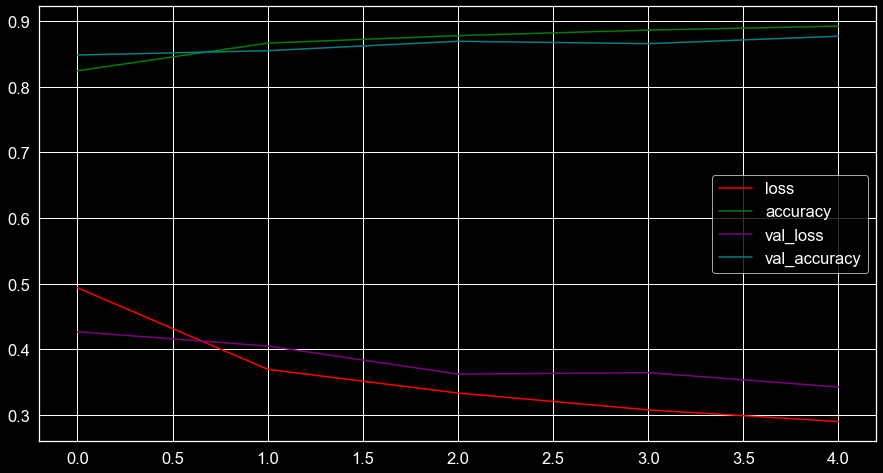

In [11]:
pd.DataFrame(model.history.history).plot(color=['red','green','purple','teal'])
# plt.savefig("20layers.png")

In [13]:
%%time
## test_loss, test_acc = 
model.evaluate(test_images, test_labels, verbose=2)

313/313 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8772
CPU times: total: 1.06 s
Wall time: 787 ms


[0.3425880968570709, 0.8772000074386597]

In [14]:
%%time
## test_loss, test_acc = 
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3426 - accuracy: 0.8772 - 545ms/epoch - 2ms/step
CPU times: total: 891 ms
Wall time: 616 ms


[0.3425880968570709, 0.8772000074386597]

# <font color = 'hotpink'> `train`> `test` implies model is overfitting </font>

# <font color = 'limegreen'> Make Predictions </font>

In [86]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [87]:
predictions = probability_model.predict(test_images)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

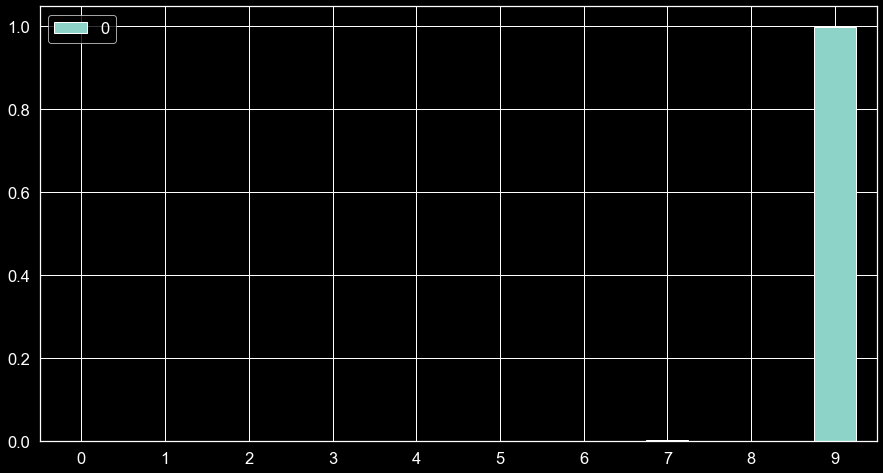

In [99]:
pd.DataFrame(predictions[0]).plot(kind='bar')
plt.xticks(rotation=360)

In [109]:
predictions[12].argmax(), predictions[12].max()

(5, 0.4342889)

<AxesSubplot:>

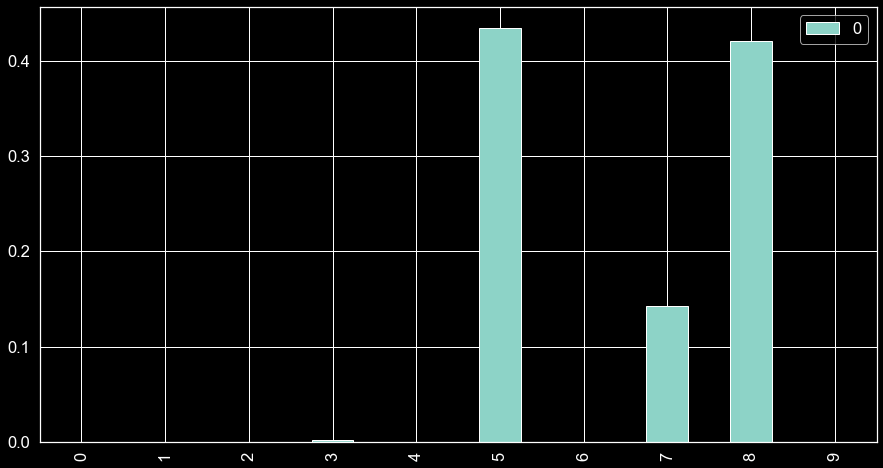

In [107]:
pd.DataFrame(predictions[12]).plot(kind='bar')

In [111]:
sns.set_context("notebook", font_scale=1.125, rc={"lines.linewidth":1.23})


In [113]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [114]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [124]:
img.shape

(1, 28, 28)

In [138]:
def graph(xx):
    _ = pd.DataFrame(xx)
    sns.barplot(_)

In [139]:
probability_model.predict(np.expand_dims(test_images[5],0))

array([[6.4142363e-08, 9.9999964e-01, 2.4116125e-09, 8.7983800e-08,
        5.7790505e-08, 1.0840516e-11, 7.6799843e-08, 8.0763458e-22,
        1.7560085e-11, 8.4414523e-17]], dtype=float32)

In [115]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[6.7567898e-06 3.4812940e-13 9.9952030e-01 1.6296537e-12 4.2767479e-04
  1.6278768e-12 4.5254379e-05 8.8113597e-22 9.8581932e-10 9.2360595e-14]]


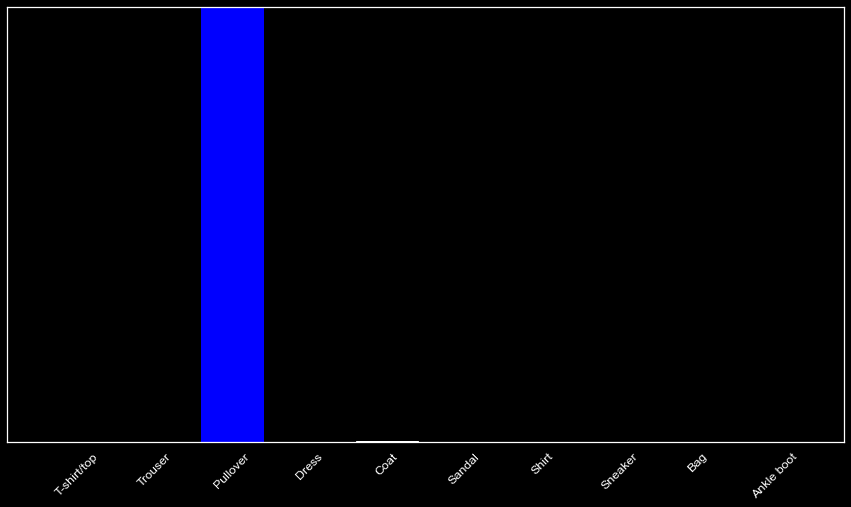

In [116]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [117]:
np.argmax(predictions_single[0])

2